## Python Final
#### Chen-I Huang
## Problem : 
####     A website sent advertisements by emails to users who interested in their product 
####     Your task is to find a good model to predict if an advertisement will be clicked with given data sets

In [1]:
## import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
pd.set_option('display.max_columns', None)

In [2]:
## read the data
click = pd.read_csv("click_history.csv")
product = pd.read_csv("product_features.csv")
user = pd.read_csv("user_features.csv")

In [3]:
print("the click data have",len(click), "rows")
click.head()

the click data have 35990 rows


,user_id,product_id,clicked
0,104863,1350,False
1,108656,1321,True
2,100120,1110,False
3,104838,1443,True
4,107304,1397,True


In [4]:
## duplicated user_id
sum(click.user_id.duplicated()==True)
## there are duplicated user_id

28790

In [5]:
print("the product data have", len(product), "rows")
product.head()

the product data have 1000 rows


,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,tools,False,101,3.349452
1,1846,skincare,False,111,5.000000
2,1762,fragrance,False,220,4.882706
3,1254,hair,True,446,5.000000
4,1493,body,True,513,-1.000000


In [6]:
## duplicated product_id
sum(product.product_id.duplicated()==True)
## no duplicated product_id

0

In [7]:
print("the user data have", len(user), "rows")
user.head()

the user data have 12000 rows


,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'sk..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk..."


In [8]:
## duplicated user_id
sum(user.user_id.duplicated()==True)
## no duplicated user_id

0

In [9]:
## combine click and product with product_id
data = pd.merge(click, product, how = "left", on = "product_id")
## combine data and user with user_id
data = pd.merge(data, user, how = "left", on = "user_id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35990 entries, 0 to 35989
Data columns (total 10 columns):
user_id                    35990 non-null int64
product_id                 35990 non-null int64
clicked                    35990 non-null bool
category                   35990 non-null object
on_sale                    35990 non-null bool
number_of_reviews          35990 non-null int64
avg_review_score           35990 non-null float64
number_of_clicks_before    34425 non-null object
ordered_before             35990 non-null bool
personal_interests         35990 non-null object
dtypes: bool(3), float64(1), int64(3), object(3)
memory usage: 2.3+ MB


In [10]:
data.head()

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests
0,104863,1350,False,nail,False,136,2.653361,2,True,"['hair', 'body']"
1,108656,1321,True,foot,True,401,1.955930,1,True,"['tools', 'hair', 'skincare', 'nail', 'men_ski..."
2,100120,1110,False,hand,True,86,3.061597,0,True,"['tools', 'men_fragrance', 'hair', 'foot', 'na..."
3,104838,1443,True,skincare,False,614,3.865110,0,True,"['tools', 'makeup', 'skincare', 'body', 'fragr..."
4,107304,1397,True,makeup,True,138,5.000000,5,True,"['hair', 'men_fragrance', 'foot', 'fragrance']"


## EDA

Text(0.5, 1.0, 'Clicked')

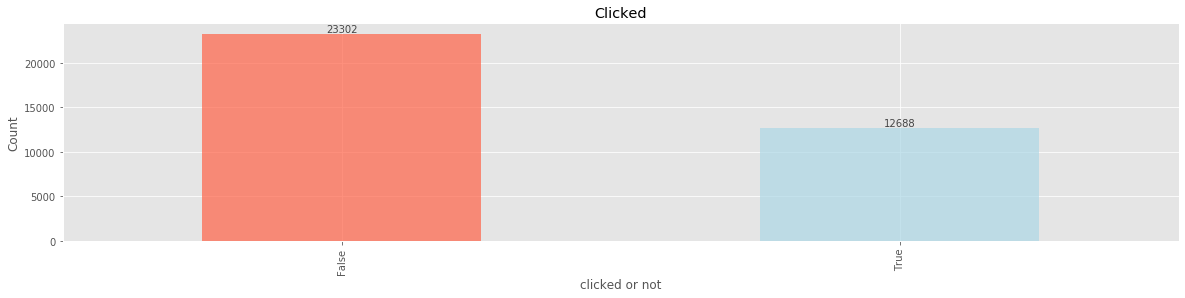

In [11]:
## how many clicked, group by click
## plot it
data.groupby("clicked")["clicked"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue"])
plt.text(0, 23302+5, "23302", ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.text(1, 12688+5, "12688", ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("clicked or not")
plt.ylabel("Count")
plt.title("Clicked")
##### not click are more than click

Text(0.5, 1.0, 'Category')

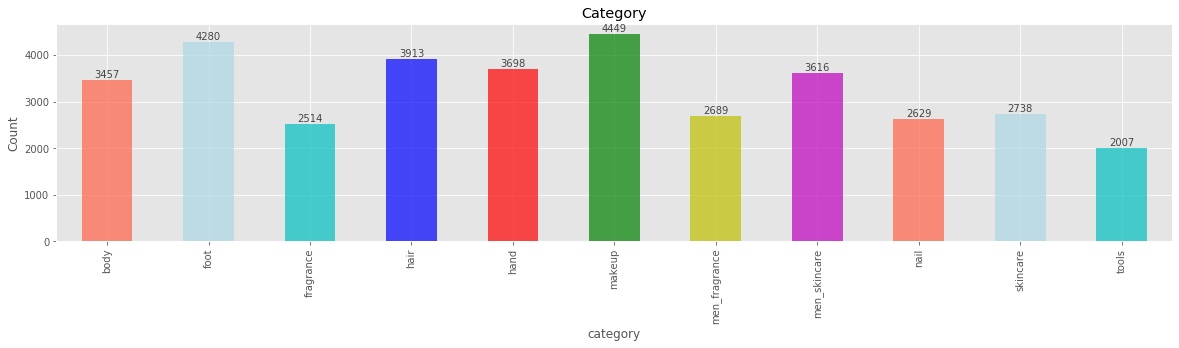

In [12]:
## how many category, group by category
category = data.groupby("category")["category"].count()
## plot it
data.groupby("category")["category"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue","c", "b", "r", "g", "y", "m"])
for i in range(0, 11):
    plt.text(i, category[i]+5, category[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("category")
plt.ylabel("Count")
plt.title("Category")
##### the makeup have most numbers

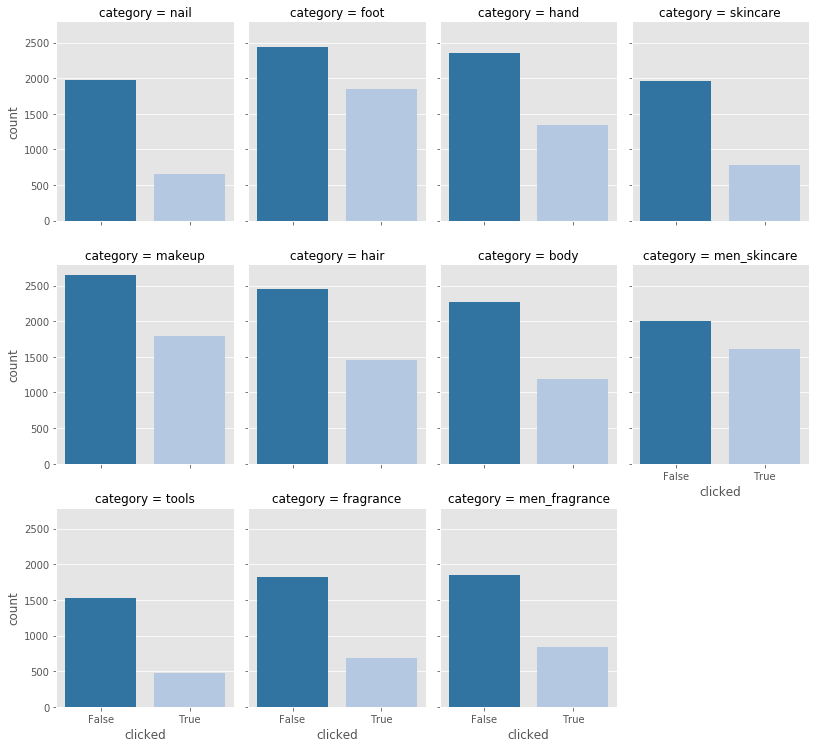

In [13]:
## category and click
sns.catplot("clicked", col= "category", col_wrap=4,
                data= data,
                kind="count", height=3.5, aspect=.8,
                palette='tab20')
##### it seems that in some category, the click rate is higher 
##### for example, foot, men_skincare

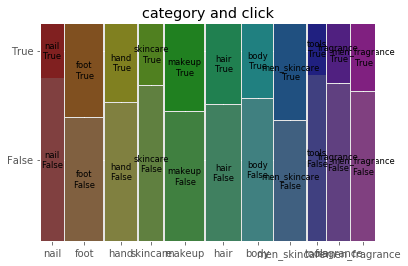

In [14]:
## category and click
mosaic(data, ["category", "clicked"], title= "category and click")
plt.show()
##### same as above, just another plot way

Text(0.5, 1.0, 'On sale')

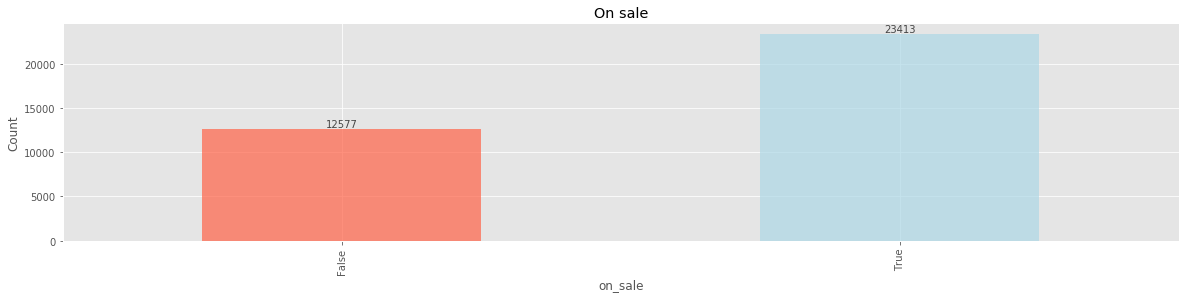

In [15]:
## how many on_sale
on_sale = data.groupby("on_sale")["on_sale"].count()
## plot it
data.groupby("on_sale")["on_sale"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue"])
for i in range(0, 2):
    plt.text(i, on_sale[i]+5, on_sale[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("on_sale")
plt.ylabel("Count")
plt.title("On sale")
##### on sale is more than not on sale

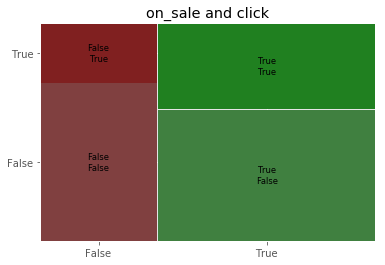

In [16]:
## on_sale and click
mosaic(data, ["on_sale", "clicked"], title= "on_sale and click")
plt.show()
##### the click rate in on sale are more than not onsale

Text(0.5, 1.0, 'Ordered before')

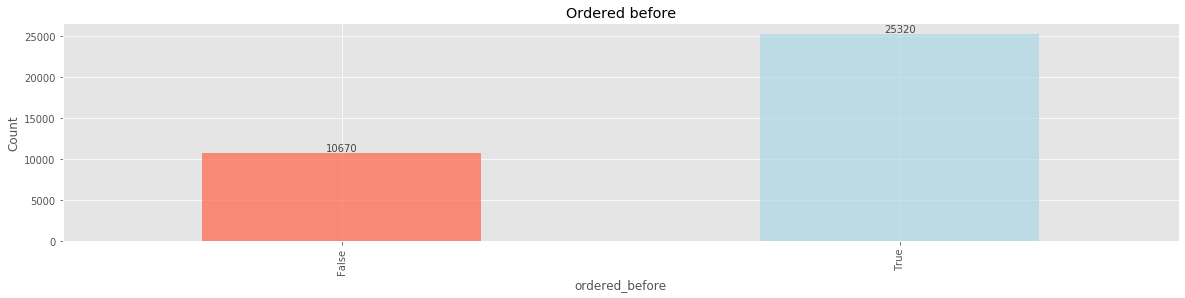

In [17]:
## how many ordered_before
ordered_before = data.groupby("ordered_before")["ordered_before"].count()
## plot it
data.groupby("ordered_before")["ordered_before"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue"])
for i in range(0, 2):
    plt.text(i, ordered_before[i]+5, ordered_before[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("ordered_before")
plt.ylabel("Count")
plt.title("Ordered before")
##### more person have order before

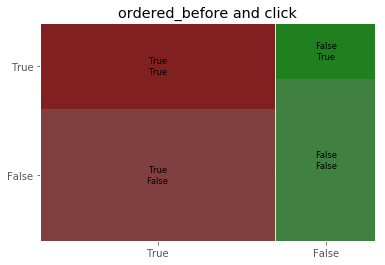

In [18]:
## ordered_before and click
mosaic(data, ["ordered_before", "clicked"], title= "ordered_before and click")
plt.show()
##### the people have order before have a higher rate of click

Text(0.5, 1.0, 'Number of clicks before')

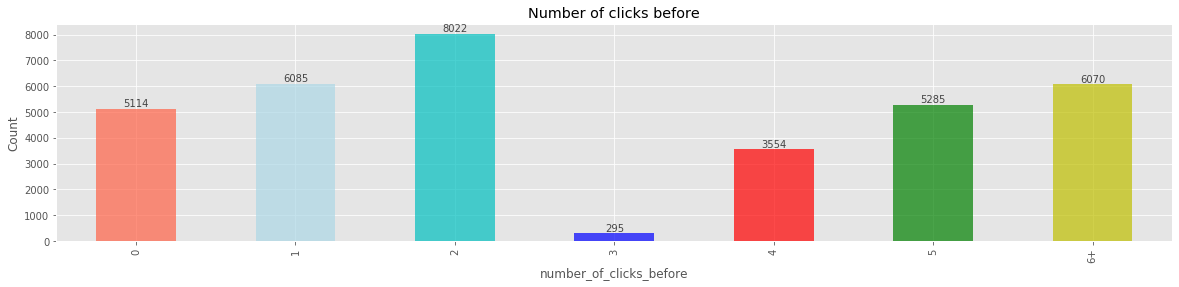

In [19]:
## how many number_of_clicks_before
number_of_clicks_before = data.groupby("number_of_clicks_before")["number_of_clicks_before"].count()
## plot it
data.groupby("number_of_clicks_before")["number_of_clicks_before"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue","c", "b", "r", "g", "y", "m"])
for i in range(0, 7):
    plt.text(i, number_of_clicks_before[i]+5, number_of_clicks_before[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("number_of_clicks_before")
plt.ylabel("Count")
plt.title("Number of clicks before")
##### click 2 before is the highest

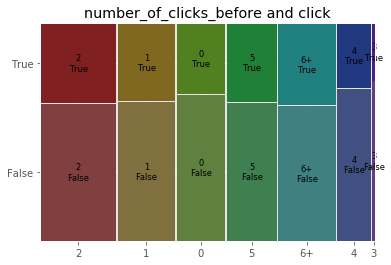

In [20]:
## number_of_clicks_before and click
mosaic(data, ["number_of_clicks_before", "clicked"], title= "number_of_clicks_before and click")
plt.show()
##### click 0 before have the lowest rate of click

In [21]:
## number_of_reviews
print("the max of number_of_reviews:", max(data["number_of_reviews"]))
print("the min of number_of_reviews:", min(data["number_of_reviews"]))
data["number_of_reviews"].describe()

##### it's strange that the max of number_of_reviews is very lagre then other

the max of number_of_reviews: 2307390
the min of number_of_reviews: 66


count    3.599000e+04
mean     1.138828e+05
std      4.987392e+05
min      6.600000e+01
25%      2.570000e+02
50%      4.710000e+02
75%      7.000000e+02
max      2.307390e+06
Name: number_of_reviews, dtype: float64

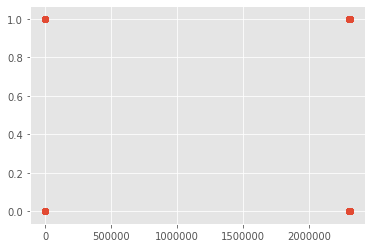

In [22]:
plt.scatter(data["number_of_reviews"], data["clicked"])
##### we can see that there are no value between

In [23]:
## get the number_of_reviews thatr are super larege
data[data["number_of_reviews"] > 2000000]

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests
79,101172,1865,True,makeup,True,2307064,1.750913,2,True,"['makeup', 'nail', 'hair', 'men_fragrance', 'f..."
87,105457,1144,True,hand,True,2307275,3.912371,2,True,"['tools', 'foot', 'men_skincare', 'fragrance']"
112,103145,1155,False,body,True,2306733,0.871357,6+,False,"['hand', 'foot', 'skincare']"
123,110008,1068,False,nail,False,2306407,4.448505,0,False,"['tools', 'makeup', 'men_skincare', 'body', 'f..."
124,102810,1542,False,skincare,False,2306318,1.572054,6+,True,"['hand', 'hair']"
...,...,...,...,...,...,...,...,...,...,...
35912,109561,1953,True,skincare,False,2306857,1.541989,6+,True,"['hand', 'men_fragrance', 'skincare', 'men_ski..."
35926,101342,1692,False,tools,False,2307240,1.492670,2,True,"['fragrance', 'men_skincare', 'men_fragrance',..."
35943,109407,1998,False,hair,True,2306552,3.204830,1,True,"['skincare', 'makeup', 'men_fragrance', 'hair'..."
35969,100731,1552,False,makeup,True,2306762,4.883468,0,True,['tools']


In [24]:
## avg_review_score
print("the max of avg_review_score:", max(data["avg_review_score"]))
print("the min of avg_review_score:", min(data["avg_review_score"]))
data["avg_review_score"].describe()

the max of avg_review_score: 5.0
the min of avg_review_score: -1.0


count    35990.000000
mean         2.650815
std          1.736823
min         -1.000000
25%          1.430110
50%          2.761251
75%          4.165674
max          5.000000
Name: avg_review_score, dtype: float64

In [25]:
## correlation
corr_columns = data.corr()
corr_columns

,user_id,product_id,clicked,on_sale,number_of_reviews,avg_review_score,ordered_before
user_id,1.000000,-0.007876,0.011316,0.004495,0.009360,-0.003475,-0.002395
product_id,-0.007876,1.000000,0.016806,-0.041065,0.031577,0.060577,0.002302
clicked,0.011316,0.016806,1.000000,0.120746,0.005315,-0.043684,0.132389
on_sale,0.004495,-0.041065,0.120746,1.000000,-0.016020,-0.005794,-0.003282
number_of_reviews,0.009360,0.031577,0.005315,-0.016020,1.000000,-0.056861,0.006965
avg_review_score,-0.003475,0.060577,-0.043684,-0.005794,-0.056861,1.000000,-0.002403
ordered_before,-0.002395,0.002302,0.132389,-0.003282,0.006965,-0.002403,1.000000


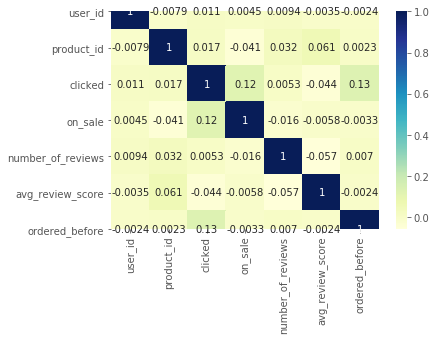

In [26]:
sns.heatmap(corr_columns, annot=True, cmap="YlGnBu")
##### all the correlation are low

## Data Cleaning and Preprocessing

#### Address the personal_interests column

In [27]:
personal_interests = []
for i in data["personal_interests"] :
    ## replace ]
    i = i.replace("[", "")
    ## replace [
    i = i.replace("]", "")
    ## replace '
    i = i.replace("'", "")
    ## replace blank
    i = i.replace(" ", "")
    ## split it with ,
    b = i.split(',')
    for s in b :
        if s not in personal_interests:
            personal_interests.append(s)
personal_interests
## same as the category, some is "" means no personal interest

['hair',
 'body',
 'tools',
 'skincare',
 'nail',
 'men_skincare',
 'men_fragrance',
 'fragrance',
 'makeup',
 'foot',
 'hand',
 '']

In [28]:
## add a new column that means how many interest
how_many_interest = []
for i in data["personal_interests"] :
    i = i.replace("[", "")
    i = i.replace("]", "")
    i = i.replace("'", "")
    i = i.replace(" ", "")
    b = i.split(',')
    if b == [""] :
        n = 0
    else:
        n = len(b)
    how_many_interest.append(n)
data["how_many_interest"] = how_many_interest
data.head()

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests,how_many_interest
0,104863,1350,False,nail,False,136,2.653361,2,True,"['hair', 'body']",2
1,108656,1321,True,foot,True,401,1.955930,1,True,"['tools', 'hair', 'skincare', 'nail', 'men_ski...",9
2,100120,1110,False,hand,True,86,3.061597,0,True,"['tools', 'men_fragrance', 'hair', 'foot', 'na...",10
3,104838,1443,True,skincare,False,614,3.865110,0,True,"['tools', 'makeup', 'skincare', 'body', 'fragr...",9
4,107304,1397,True,makeup,True,138,5.000000,5,True,"['hair', 'men_fragrance', 'foot', 'fragrance']",4


Text(0.5, 1.0, 'how_many_interest')

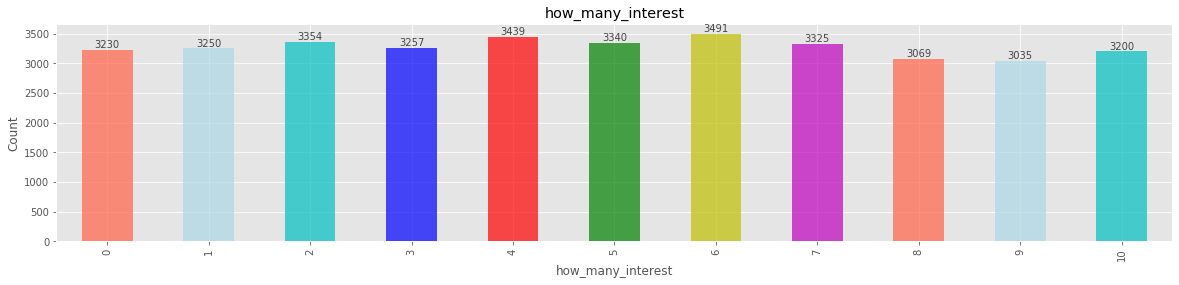

In [29]:
## how many interest
how_many_interest = data.groupby("how_many_interest")["how_many_interest"].count()
## plot it
data.groupby("how_many_interest")["how_many_interest"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue","c", "b", "r", "g", "y", "m"])
for i in range(0, 11):
    plt.text(i, how_many_interest[i]+5, how_many_interest[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("how_many_interest")
plt.ylabel("Count")
plt.title("how_many_interest")

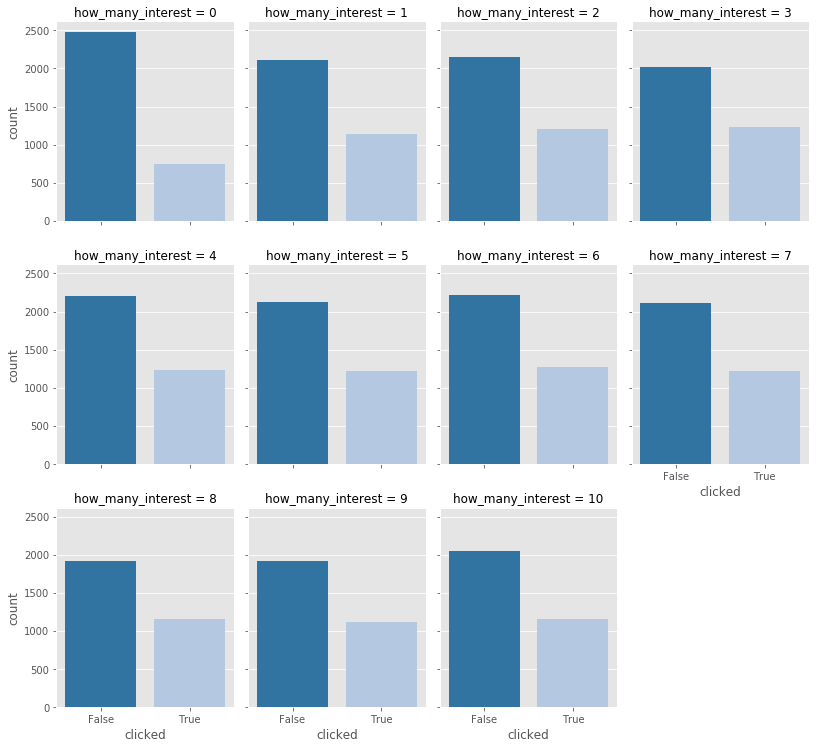

In [30]:
## how_many_interest and click
sns.catplot("clicked", col= "how_many_interest", col_wrap=4,
                data= data,
                kind="count", height=3.5, aspect=.8,
                palette='tab20')
## it seems that how_many_interest didn't have influence on clicks

In [31]:
## add a column that shows if the personal_interests included the category 
same = []
for i in range(len(data)):
    a = data["personal_interests"][i]
    a = a.replace("[", "")
    a = a.replace("]", "")
    a = a.replace("'", "")
    a = a.replace(" ", "")
    a = a.split(',')
    try:
        a.index(data["category"][i])
        same.append(1)
    except:
        same.append(0)
data["same"] = same
data.head()

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests,how_many_interest,same
0,104863,1350,False,nail,False,136,2.653361,2,True,"['hair', 'body']",2,0
1,108656,1321,True,foot,True,401,1.955930,1,True,"['tools', 'hair', 'skincare', 'nail', 'men_ski...",9,0
2,100120,1110,False,hand,True,86,3.061597,0,True,"['tools', 'men_fragrance', 'hair', 'foot', 'na...",10,0
3,104838,1443,True,skincare,False,614,3.865110,0,True,"['tools', 'makeup', 'skincare', 'body', 'fragr...",9,1
4,107304,1397,True,makeup,True,138,5.000000,5,True,"['hair', 'men_fragrance', 'foot', 'fragrance']",4,0


Text(0.5, 1.0, 'same')

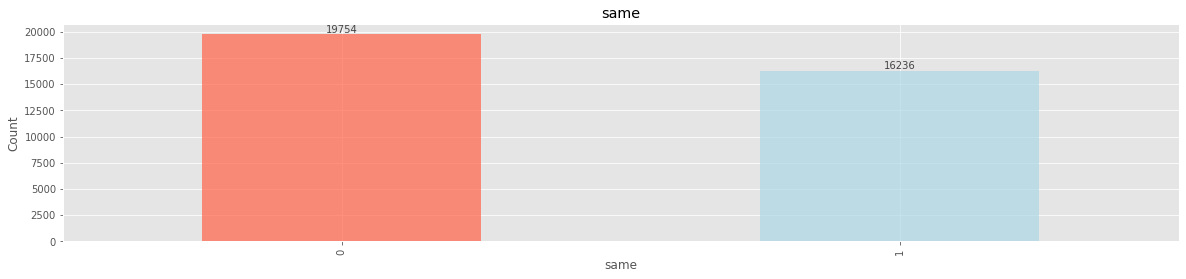

In [32]:
## how many same
same = data.groupby("same")["same"].count()
## plot it
data.groupby("same")["same"].count().plot(kind='bar', figsize=(20, 4), alpha=0.7, color = ["tomato", "lightblue","c", "b", "r", "g", "y", "m"])
for i in range(0, 2):
    plt.text(i, same[i]+5, same[i], ha='center', va= 'bottom',fontsize=10, alpha=0.7)
plt.xlabel("same")
plt.ylabel("Count")
plt.title("same")

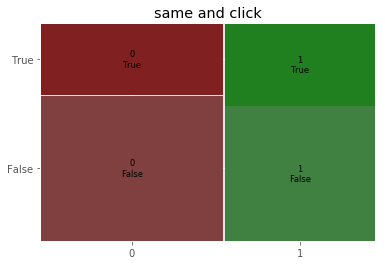

In [33]:
## same and click
mosaic(data, ["same", "clicked"], title= "same and click")
plt.show()
## It seems that there is link betweew same and click

In [34]:
## change the type in personal interest so that later we can use one hot encoding or dummy
personal_interests = []
for i in range(len(data["personal_interests"])) :
    ## replace ]
    data["personal_interests"][i] = data["personal_interests"][i].replace("[", "")
    ## replace [
    data["personal_interests"][i] = data["personal_interests"][i].replace("]", "")
    ## replace '
    data["personal_interests"][i] = data["personal_interests"][i].replace("'", "")
    ## replace blank
    data["personal_interests"][i] = data["personal_interests"][i].replace(" ", "")
    ## split it with ,
    data["personal_interests"][i] = data["personal_interests"][i].split(',')
type(data["personal_interests"][0]) 

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launc

list

In [35]:
## change the 6+ in number_of_clicks_before into 6
data["number_of_clicks_before"][data["number_of_clicks_before"] == "6+"] = "6"

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
## change the type of number_of_clicks_before into int
data["number_of_clicks_before"] = pd.to_numeric(data["number_of_clicks_before"])
data["number_of_clicks_before"]

0        2.0
1        1.0
2        0.0
3        0.0
4        5.0
        ... 
35985    1.0
35986    1.0
35987    5.0
35988    2.0
35989    0.0
Name: number_of_clicks_before, Length: 35990, dtype: float64

## Dummy

In [37]:
## address category
data_dum = pd.get_dummies(data["category"])
## join back to data
data_dum = data.join(data_dum)
## remove category
data_dum = data_dum.drop(columns= "category")
data_dum.head()

,user_id,product_id,clicked,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests,how_many_interest,same,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools
0,104863,1350,False,False,136,2.653361,2.0,True,"[hair, body]",2,0,0,0,0,0,0,0,0,0,1,0,0
1,108656,1321,True,True,401,1.955930,1.0,True,"[tools, hair, skincare, nail, men_skincare, me...",9,0,0,1,0,0,0,0,0,0,0,0,0
2,100120,1110,False,True,86,3.061597,0.0,True,"[tools, men_fragrance, hair, foot, nail, fragr...",10,0,0,0,0,0,1,0,0,0,0,0,0
3,104838,1443,True,False,614,3.865110,0.0,True,"[tools, makeup, skincare, body, fragrance, foo...",9,1,0,0,0,0,0,0,0,0,0,1,0
4,107304,1397,True,True,138,5.000000,5.0,True,"[hair, men_fragrance, foot, fragrance]",4,0,0,0,0,0,0,1,0,0,0,0,0


In [38]:
## address personal_interests
## hair
## body
## tools
## skincare
## nail
## men_skincare
## men_fragrance
## fragrance
## makeup
## foot
## hand
hair = []
body = []
tools = []
skincare = []
nail = []
men_skincare = []
men_fragrance = []
fragrance = []
makeup = []
foot = []
hand = []
for i in data_dum["personal_interests"]:
    if "hair" in i :
        hair.append(1)
    else:
        hair.append(0)
        
    if "body" in i :
        body.append(1)
    else:
        body.append(0)
        
    if "tools" in i :
        tools.append(1)
    else:
        tools.append(0)
        
    if "skincare" in i :
        skincare.append(1)
    else:
        skincare.append(0)
        
    if "nail" in i :
        nail.append(1)
    else:
        nail.append(0)
        
    if "men_skincare" in i :
        men_skincare.append(1)
    else:
        men_skincare.append(0)
        
    if "men_fragrance" in i :
        men_fragrance.append(1)
    else:
        men_fragrance.append(0)
        
    if "fragrance" in i :
        fragrance.append(1)
    else:
        fragrance.append(0)
        
    if "makeup" in i :
        makeup.append(1)
    else:
        makeup.append(0)
        
    if "foot" in i :
        foot.append(1)
    else:
        foot.append(0)
        
    if "hand" in i :
        hand.append(1)
    else:
        hand.append(0)
## add back to the data
data_dum["interests_hair"] = hair
data_dum["interests_body"] = body
data_dum["interests_tools"] = tools
data_dum["interests_skincare"] = skincare
data_dum["interests_nail"] = nail
data_dum["interests_men_skincare"] = men_skincare
data_dum["interests_men_fragrance"] = men_fragrance
data_dum["interests_fragrance"] = fragrance
data_dum["interests_makeup"] = makeup
data_dum["interests_foot"] = foot
data_dum["interests_hand"] = hand
## check it
data_dum.head()

,user_id,product_id,clicked,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests,how_many_interest,same,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools,interests_hair,interests_body,interests_tools,interests_skincare,interests_nail,interests_men_skincare,interests_men_fragrance,interests_fragrance,interests_makeup,interests_foot,interests_hand
0,104863,1350,False,False,136,2.653361,2.0,True,"[hair, body]",2,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
1,108656,1321,True,True,401,1.955930,1.0,True,"[tools, hair, skincare, nail, men_skincare, me...",9,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0
2,100120,1110,False,True,86,3.061597,0.0,True,"[tools, men_fragrance, hair, foot, nail, fragr...",10,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0
3,104838,1443,True,False,614,3.865110,0.0,True,"[tools, makeup, skincare, body, fragrance, foo...",9,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,1,1
4,107304,1397,True,True,138,5.000000,5.0,True,"[hair, men_fragrance, foot, fragrance]",4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0


In [39]:
## remove personal_interests
data_dum = data_dum.drop(columns= "personal_interests")
## check it
data_dum.head()

,user_id,product_id,clicked,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,how_many_interest,same,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools,interests_hair,interests_body,interests_tools,interests_skincare,interests_nail,interests_men_skincare,interests_men_fragrance,interests_fragrance,interests_makeup,interests_foot,interests_hand
0,104863,1350,False,False,136,2.653361,2.0,True,2,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
1,108656,1321,True,True,401,1.955930,1.0,True,9,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0
2,100120,1110,False,True,86,3.061597,0.0,True,10,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0
3,104838,1443,True,False,614,3.865110,0.0,True,9,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,1,1
4,107304,1397,True,True,138,5.000000,5.0,True,4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0


## Missing values

In [40]:
data_dum[data_dum.isnull().values==True]
## only the number_of_clicks_before have NaN 

,user_id,product_id,clicked,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,how_many_interest,same,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools,interests_hair,interests_body,interests_tools,interests_skincare,interests_nail,interests_men_skincare,interests_men_fragrance,interests_fragrance,interests_makeup,interests_foot,interests_hand
58,104407,1723,False,True,783,3.525117,NaN,True,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
70,110016,1788,True,True,459,2.232434,NaN,True,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
94,108464,1124,True,False,602,5.000000,NaN,True,5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0
115,101662,1829,False,False,738,4.588955,NaN,True,6,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,0,1
120,106703,1533,True,True,186,1.801611,NaN,True,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35845,102608,1911,True,False,408,1.402092,NaN,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35904,103285,1082,False,True,153,2.686860,NaN,True,3,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
35908,102520,1475,True,False,333,2.118193,NaN,False,9,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0
35922,103421,1015,False,True,69,4.417713,NaN,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
## Random Forest Imputation
from missingpy import MissForest
imputer = MissForest()
data_dum_imputed = imputer.fit_transform(data_dum)
data_dum_imputed = pd.DataFrame(data_dum_imputed)

Iteration: 0
Iteration: 1
Iteration: 2


In [42]:
data_dum_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,104863.0,1350.0,0.0,0.0,136.0,2.653361,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108656.0,1321.0,1.0,1.0,401.0,1.955930,1.0,1.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,100120.0,1110.0,0.0,1.0,86.0,3.061597,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,104838.0,1443.0,1.0,0.0,614.0,3.865110,0.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,107304.0,1397.0,1.0,1.0,138.0,5.000000,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [46]:
data_dum_imputed[[4, 5]]

,4,5
0,136.0,2.653361
1,401.0,1.955930
2,86.0,3.061597
3,614.0,3.865110
4,138.0,5.000000
...,...,...
35985,325.0,4.801198
35986,320.0,-1.000000
35987,209.0,1.839260
35988,153.0,2.686860


## Scale

In [47]:
from sklearn import preprocessing

In [48]:
##Z-Score
zscore = preprocessing.StandardScaler()
## just do it for number_of_reviews and avg_review_score
data_zs = zscore.fit_transform(data_dum_imputed[[4, 5]])

In [49]:
data_zs = pd.DataFrame(data_zs)

In [67]:
data_zs.columns = ['4','5']
data_zs.head()

,4,5
0,-0.228072,0.001466
1,-0.227541,-0.400096
2,-0.228172,0.236516
3,-0.227113,0.699157
4,-0.228068,1.352595


In [68]:
data_dum_imputed = data_dum_imputed.join(data_zs)

In [64]:
data_dum_imputed= data_dum_imputed.drop(columns=4)
data_dum_imputed= data_dum_imputed.drop(columns=5)

In [69]:
data_dum_imputed.head()

,0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,4,5
0,104863.0,1350.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.228072,0.001466
1,108656.0,1321.0,1.0,1.0,1.0,1.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-0.227541,-0.400096
2,100120.0,1110.0,0.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.228172,0.236516
3,104838.0,1443.0,1.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,-0.227113,0.699157
4,107304.0,1397.0,1.0,1.0,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.228068,1.352595


## Outlier

In [47]:
## detect the outlier by LOF
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(data_dum)

In [48]:
#  1: normal
# -1: anomalies/outliers
data_dum["outlier"] = y_pred
## keep only 1
data_dum_ro = data_dum[data_dum["outlier"] == 1]

In [49]:
data_dum = data_dum.drop(columns= "outlier")
data_dum_ro = data_dum_ro.drop(columns= "outlier")

In [50]:
data_dum_ro.head()

,user_id,product_id,clicked,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,how_many_interest,same,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools,interests_hair,interests_body,interests_tools,interests_skincare,interests_nail,interests_men_skincare,interests_men_fragrance,interests_fragrance,interests_makeup,interests_foot,interests_hand
0,104863,1350,False,False,-0.228072,0.001466,2.0,True,2,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
1,108656,1321,True,True,-0.227541,-0.400096,1.0,True,9,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0
2,100120,1110,False,True,-0.228172,0.236516,0.0,True,10,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0
3,104838,1443,True,False,-0.227113,0.699157,0.0,True,9,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,1,1
4,107304,1397,True,True,-0.228068,1.352595,5.0,True,4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0


## Model

In [70]:
data_dum_imputed.head()

,0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,4,5
0,104863.0,1350.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.228072,0.001466
1,108656.0,1321.0,1.0,1.0,1.0,1.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-0.227541,-0.400096
2,100120.0,1110.0,0.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.228172,0.236516
3,104838.0,1443.0,1.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,-0.227113,0.699157
4,107304.0,1397.0,1.0,1.0,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.228068,1.352595


In [79]:
data_dum_imputed[[2]]

,2
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
35985,0.0
35986,1.0
35987,0.0
35988,1.0


In [80]:
from sklearn.model_selection import train_test_split
## split the data into train and test sets with a ratio of 0.7:0.3
y = data_dum_imputed[[2]]
x = data_dum_imputed.drop(columns= 2)
train_data,test_data,train_target,test_target = train_test_split(x, y, test_size = 0.3, stratify = y)

#### SVM

In [56]:
from sklearn.svm import SVC
from sklearn import metrics
## rbf
svm = SVC(kernel="rbf")
svm.fit(train_data, train_target)
## predict
predictions = svm.predict(test_data)
## accuracy
accuracy = metrics.accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.6438567606503396


#### Random Forest

In [81]:
from sklearn import ensemble, metrics
## random forest model 
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_data, train_target)

## predict
test_y_predicted = forest.predict(test_data)

## accuracy
accuracy = metrics.accuracy_score(test_target, test_y_predicted)
print("Accuracy:", accuracy)

## without remove outlier Accuracy: 0.7466888950634436
## remove outlier Accuracy: 0.7466556904712904

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.7486338797814208


#### XGBoost

In [82]:
## import
from xgboost import XGBClassifier
## model
xgbc = XGBClassifier()
## train
xgbc.fit(train_data, train_target)
## accuracy
print("Accuracy:", xgbc.score(test_data, test_target))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7646568491247568


In [ ]:
#### tune the model(took too much time, don't run it)
from sklearn.model_selection import GridSearchCV
parameters = {
              'max_depth': [5, 10, 15, 20, 25],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'n_estimators': [500, 1000, 2000, 3000, 5000],
              'min_child_weight': [0, 2, 5, 10, 20],
              'max_delta_step': [0, 0.2, 0.6, 1, 2],
              'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
              'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
              'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
              'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]
}

xlf = XGBClassifier(max_depth=10,
learning_rate=0.01,
n_estimators=2000,
silent=True,
objective='binary:logistic',
nthread=-1,
gamma=0,
min_child_weight=1,
max_delta_step=0,
subsample=0.85,
colsample_bytree=0.7,
colsample_bylevel=1,
reg_alpha=0,
reg_lambda=1,
scale_pos_weight=1,
seed=1440,
missing=None)

## gridsearch, search the best parameter
gsearch = GridSearchCV(xlf, param_grid=parameters, scoring='accuracy', cv=3)
gsearch.fit(train_data, train_target)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


## Conclusion

#### I did three model: SVM, Random Forest and XGBoost
#### The accuracy for SVM is the worst, only 64%. Moreover, the efficiency also the worst, it took the longest time to run. And I have try the kernel for "linear" and "rbf", it doesn't make any difference. The accuracy for rbf only higher 0.000 something than linear. 
#### The second is Random Forest, the accuracy is about 75%.
#### The best model is xgboost, the accuracy is about 76%, a little higher then Random Forest. For xgboost, I also use GridSearchCV to find the best parameters, it took me a night to run it, but didn't make a big progress, only 0.000 something higher (Sorry I re-run the jupyter notebook so the output is gone, and it take too much time so I didn't re-run second time).

#### As far as I know, which important the most is not about the model, but the data preprocess. For example, the difference between Random Forest and Xgboost is only 1%.
#### I extract the data from personal_interests, fill the missing value, scale and remove the outlier, but the accuracy is still not high. I have try predict the value with outlier and remove the outlier, it doesn't make a big difference. 